In [72]:
import numpy as np
import pandas as pd
from tabulate import tabulate

class DataProcessor:
    def load_data(self, file_path):
        try:
            # Load the data from the CSV file
            data = pd.read_csv(file_path)
            return data
        except FileNotFoundError:
            print("File not found!")
            return None

    def clean_data(self, data):
        # Dropping specified columns
        columns_to_drop = ['name', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.numHelpful', 'reviews.sourceURLs', 'sourceURLs']
        data = data.drop(columns_to_drop, axis=1)

        # Rename columns
        new_column_names = {
            'id': 'ID',
            'dateAdded': 'Added',
            'dateUpdated': 'Updated',
            'brand': 'Brand',
            'categories': 'Categories',
            'primaryCategories': 'Primary Categories',
            'manufacturer': 'Manufacturer',
            'reviews.date': 'Review Date',
            'reviews.doRecommend': 'Recommend',
            'reviews.rating': 'Rating',
            'reviews.text': 'Review Text',
            'reviews.title': 'Review Title',
            'reviews.username': 'Username'
        }
        data = data.rename(columns=new_column_names)

        # Cleaning specific columns
        data['Brand'] = data['Brand'].str.replace('old_value', 'new_value')
        data['Review Text'] = data['Review Text'].str.replace('old_value', 'new_value')

        # Drop rows with missing values
        data = data.dropna()

        return data

# Create an instance of the DataProcessor class
data_processor = DataProcessor()

# Load the data
data = data_processor.load_data("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

if data is not None:
    # Clean the data
    cleaned_data = data_processor.clean_data(data)

    # Display the cleaned data using df.head()
    print(cleaned_data.head())


                      ID                 Added               Updated  \
3   AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
6   AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
21  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
70  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
77  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   

         asins   Brand                                         Categories  \
3   B00ZV9PXP2  Amazon  Computers,Electronics Features,Tablets,Electro...   
6   B00ZV9PXP2  Amazon  Computers,Electronics Features,Tablets,Electro...   
21  B00ZV9PXP2  Amazon  Computers,Electronics Features,Tablets,Electro...   
70  B00ZV9PXP2  Amazon  Computers,Electronics Features,Tablets,Electro...   
77  B00ZV9PXP2  Amazon  Computers,Electronics Features,Tablets,Electro...   

   Primary Categories                                          imageURLs  \
3         Electronics  https

In [35]:
import pandas as pd
from tabulate import tabulate

class DataProcessor:
    def load_data(self, filepath):
        return pd.read_csv(filepath)
    
    def clean_data(self, data):
        cleaned_data = data.copy()
        # Perform data cleaning operations if needed
        return cleaned_data

class DataAnalyzer:
    def get_average_of_column(self, data):
        data['Month'] = pd.to_datetime(data['reviews.date']).dt.to_period('M')
        average_column = data.groupby('Month')['reviews.rating'].mean().reset_index()
        return average_column

    def get_distribution_of_column(self, data, column):
        column_distribution = data[column].value_counts().reset_index()
        column_distribution.columns = [column, 'Count']
        return column_distribution

    def get_median_of_column(self, data):
        median_column = data.groupby('reviews.doRecommend')['reviews.rating'].median().reset_index()
        median_column.columns = ['Recommend', 'Median Rating']
        return median_column

    def get_mode_of_column(self, data):
        mode_column = data.groupby('reviews.rating')['reviews.title'].apply(lambda x: x.mode()).reset_index()
        mode_column.columns = ['Rating', 'Mode Title']
        return mode_column

# Create an instance of the DataProcessor class
data_processor = DataProcessor()

# Load and clean the data
data = data_processor.load_data('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
cleaned_data = data_processor.clean_data(data)

# Create an instance of the DataAnalyzer class
data_analyzer = DataAnalyzer()

# Calculate average rating by month
average_rating = data_analyzer.get_average_of_column(cleaned_data)
print("Average Rating by Month:")
print(tabulate(average_rating, headers='keys', tablefmt='psql'))
print()

# Calculate rating distribution
rating_distribution = data_analyzer.get_distribution_of_column(cleaned_data, 'reviews.rating')
print("Rating Distribution:")
print(tabulate(rating_distribution, headers='keys', tablefmt='psql'))
print()

# Calculate median rating and recommendation distribution
median_rating = data_analyzer.get_median_of_column(cleaned_data)
print("Median Rating by Recommendation:")
print(tabulate(median_rating, headers='keys', tablefmt='psql'))
print()

# Calculate mode of rating and title distribution
mode_rating = data.groupby('reviews.rating')['reviews.title'].agg(lambda x: x.mode()[0]).reset_index()
mode_rating.columns = ['Rating', 'Mode Title']
mode_rating = mode_rating.dropna()  # Drop rows with NaN values
print("Mode Title by Rating:")
print(tabulate(mode_rating, headers='keys', tablefmt='psql'))


Average Rating by Month:
+----+---------+------------------+
|    | Month   |   reviews.rating |
|----+---------+------------------|
|  0 | 2014-10 |          5       |
|  1 | 2014-11 |          4       |
|  2 | 2014-12 |          5       |
|  3 | 2015-01 |          4.66667 |
|  4 | 2015-02 |          5       |
|  5 | 2015-03 |          5       |
|  6 | 2015-04 |          4.625   |
|  7 | 2015-05 |          5       |
|  8 | 2015-06 |          4       |
|  9 | 2015-07 |          4.66667 |
| 10 | 2015-08 |          4.55556 |
| 11 | 2015-09 |          5       |
| 12 | 2015-11 |          5       |
| 13 | 2015-12 |          5       |
| 14 | 2016-01 |          5       |
| 15 | 2016-02 |          5       |
| 16 | 2016-03 |          3       |
| 17 | 2016-04 |          4.75    |
| 18 | 2016-05 |          4.84615 |
| 19 | 2016-06 |          4.56    |
| 20 | 2016-07 |          4.41176 |
| 21 | 2016-08 |          4.41304 |
| 22 | 2016-09 |          4.6     |
| 23 | 2016-10 |          4.45522 |
| 2

C:\Users\marwa\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [8]:
import pandas as pd

class DataAnalyzer:
    def calculate_average_rating_by_month(self, data):
        # Convert the "reviews.date" column to datetime
        data['reviews.date'] = pd.to_datetime(data['reviews.date'])
        # Extract the month and year from the "reviews.date" column
        data['Month'] = data['reviews.date'].dt.to_period('M')
        # Calculate the average rating by month
        average_rating = data.groupby('Month')['reviews.rating'].mean().reset_index()
        return average_rating

    def calculate_distribution(self, data, column):
        # Calculate the distribution of values in the specified column
        distribution = data[column].value_counts(normalize=True).reset_index()
        distribution.columns = [column, 'Percentage']
        return distribution

# Create an instance of the DataAnalyzer class
data_analyzer = DataAnalyzer()

# Load the data
data = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")

# Calculate average rating by month
average_rating_by_month = data_analyzer.calculate_average_rating_by_month(data)
print("Average Rating by Month:")
print(average_rating_by_month.head())

# Calculate distribution of ratings
rating_distribution = data_analyzer.calculate_distribution(data, 'reviews.rating')
print("\nRating Distribution:")
print(rating_distribution.head())

# Calculate distribution of recommendations
recommendation_distribution = data_analyzer.calculate_distribution(data, 'reviews.doRecommend')
print("\nRecommendation Distribution:")
print(recommendation_distribution.head())

# Calculate distribution of feedback count
feedback_count_distribution = data_analyzer.calculate_distribution(data, 'reviews.title')
print("\nFeedback Count Distribution:")
print(feedback_count_distribution.head())


Average Rating by Month:
     Month  reviews.rating
0  2014-10        5.000000
1  2014-11        4.000000
2  2014-12        5.000000
3  2015-01        4.666667
4  2015-02        5.000000

Rating Distribution:
   reviews.rating  Percentage
0               5      0.6956
1               4      0.2416
2               3      0.0394
3               1      0.0126
4               2      0.0108

Recommendation Distribution:
   reviews.doRecommend  Percentage
0                 True       0.953
1                False       0.047

Feedback Count Distribution:
   reviews.title  Percentage
0   Great tablet    0.024464
1  Great product    0.015641
2        Love it    0.013635
3          Great    0.012633
4        Awesome    0.010227


C:\Users\marwa\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [73]:
import matplotlib.pyplot as plt
import os

class DataVisualizer:
    def __init__(self, output_dir='output'):
        self.output_dir = output_dir
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

    def save_plot(self, plot, filename):
        # Save the plot as an image file in the specified output directory
        filepath = os.path.join(self.output_dir, filename)
        plot.savefig(filepath)
        print(f"Plot saved as {filepath}")

    def plot_line_chart(self, data, column):
        # Plot a line chart using the specified column of the data
        plt.plot(data[column])
        plt.xlabel('Index')
        plt.ylabel(column)
        plt.title('Line Chart')
        filename = f"{column}_line_chart.png"
        self.save_plot(plt, filename)

    def plot_distribution(self, data, column):
        # Plot a distribution chart using the specified column of the data
        data[column].value_counts().plot(kind='bar')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title('Distribution')
        filename = f"{column}_distribution.png"
        self.save_plot(plt, filename)

    def plot_pie(self, data, column):
        # Plot a pie chart using the specified column of the data
        data[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.axis('equal')
        plt.title('Pie Chart')
        filename = f"{column}_pie_chart.png"
        self.save_plot(plt, filename)

    def plot_scatter(self, data, column):
        # Plot a scatter plot using the specified column of the data
        plt.scatter(range(len(data)), data[column])
        plt.xlabel('Index')
        plt.ylabel(column)
        plt.title('Scatter Plot')
        filename = f"{column}_scatter_plot.png"
        self.save_plot(plt, filename)


In [74]:
data_visualizer = DataVisualizer()


Plot saved as output\reviews.rating_line_chart.png


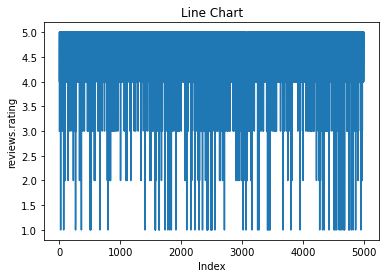

In [75]:
# Plot line chart
data_visualizer.plot_line_chart(data, 'reviews.rating')

Plot saved as output\reviews.rating_distribution.png


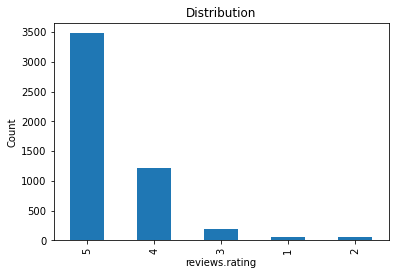

In [76]:
data_visualizer.plot_distribution(data, 'reviews.rating')

In [77]:
data_visualizer.plot_pie(data, 'reviews.rating')

Plot saved as output\reviews.rating_pie_chart.png


Plot saved as output\reviews.rating_scatter_plot.png


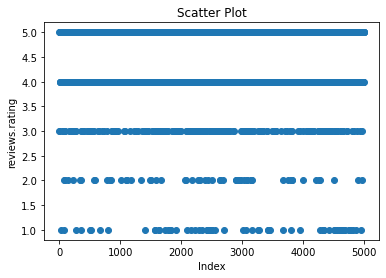

In [78]:
data_visualizer.plot_scatter(data, 'reviews.rating')